In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

C:\Users\moni\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

# Define dataset path
data_dir = "C:/Users/moni/Downloads/ML project image"

# Define parameters
img_size = (224, 224)
batch_size = 32
epochs = 25


In [3]:

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Print class indices to verify class count
print(train_generator.class_indices)


Found 745 images belonging to 5 classes.
Found 183 images belonging to 5 classes.
{'.ipynb_checkpoints': 0, 'ECG Images of Myocardial Infarction Patients (240x12=2880)': 1, 'ECG Images of Patient that have History of MI (172x12=2064)': 2, 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 3, 'Normal Person ECG Images (284x12=3408)': 4}


In [5]:

# Build CNN Model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')   # Updated to match number of classes
])


C:\Users\moni\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

# Compile Model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [7]:

# Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


C:\Users\moni\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.2468 - loss: 3.0043 - val_accuracy: 0.3060 - val_loss: 1.3982
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.2999 - loss: 1.4326 - val_accuracy: 0.2568 - val_loss: 1.3836
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step - accuracy: 0.3333 - loss: 1.3851 - val_accuracy: 0.3169 - val_loss: 1.3447
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.3752 - loss: 1.3519 - val_accuracy: 0.4536 - val_loss: 1.2090
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.4716 - loss: 1.1962 - val_accuracy: 0.8579 - val_loss: 0.7095
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6477 - loss: 0.8697 - val_accuracy: 0.7760 - val_loss: 0.6070
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7870 - loss: 0.6314 - val_accuracy: 0.9016 - val_loss: 0.4313
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8230 - loss: 0.5118 - val_accuracy: 0.8689 - val_loss:

In [8]:
### # Save Model
model.save("C:/Users/moni/Downloads/ML project image_cnn.h5")



In [9]:

# Evaluate Model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")





6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9493 - loss: 0.2266
Validation Accuracy: 95.63%


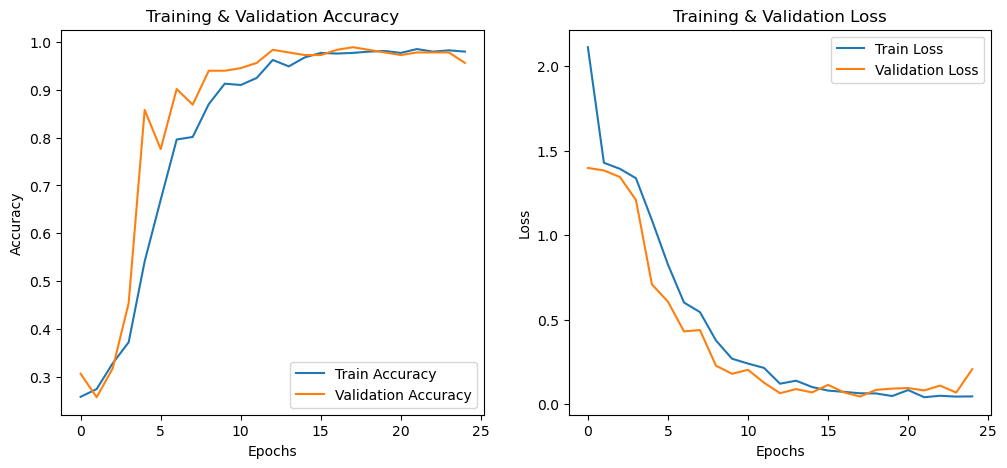

In [11]:
# Plot Training Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

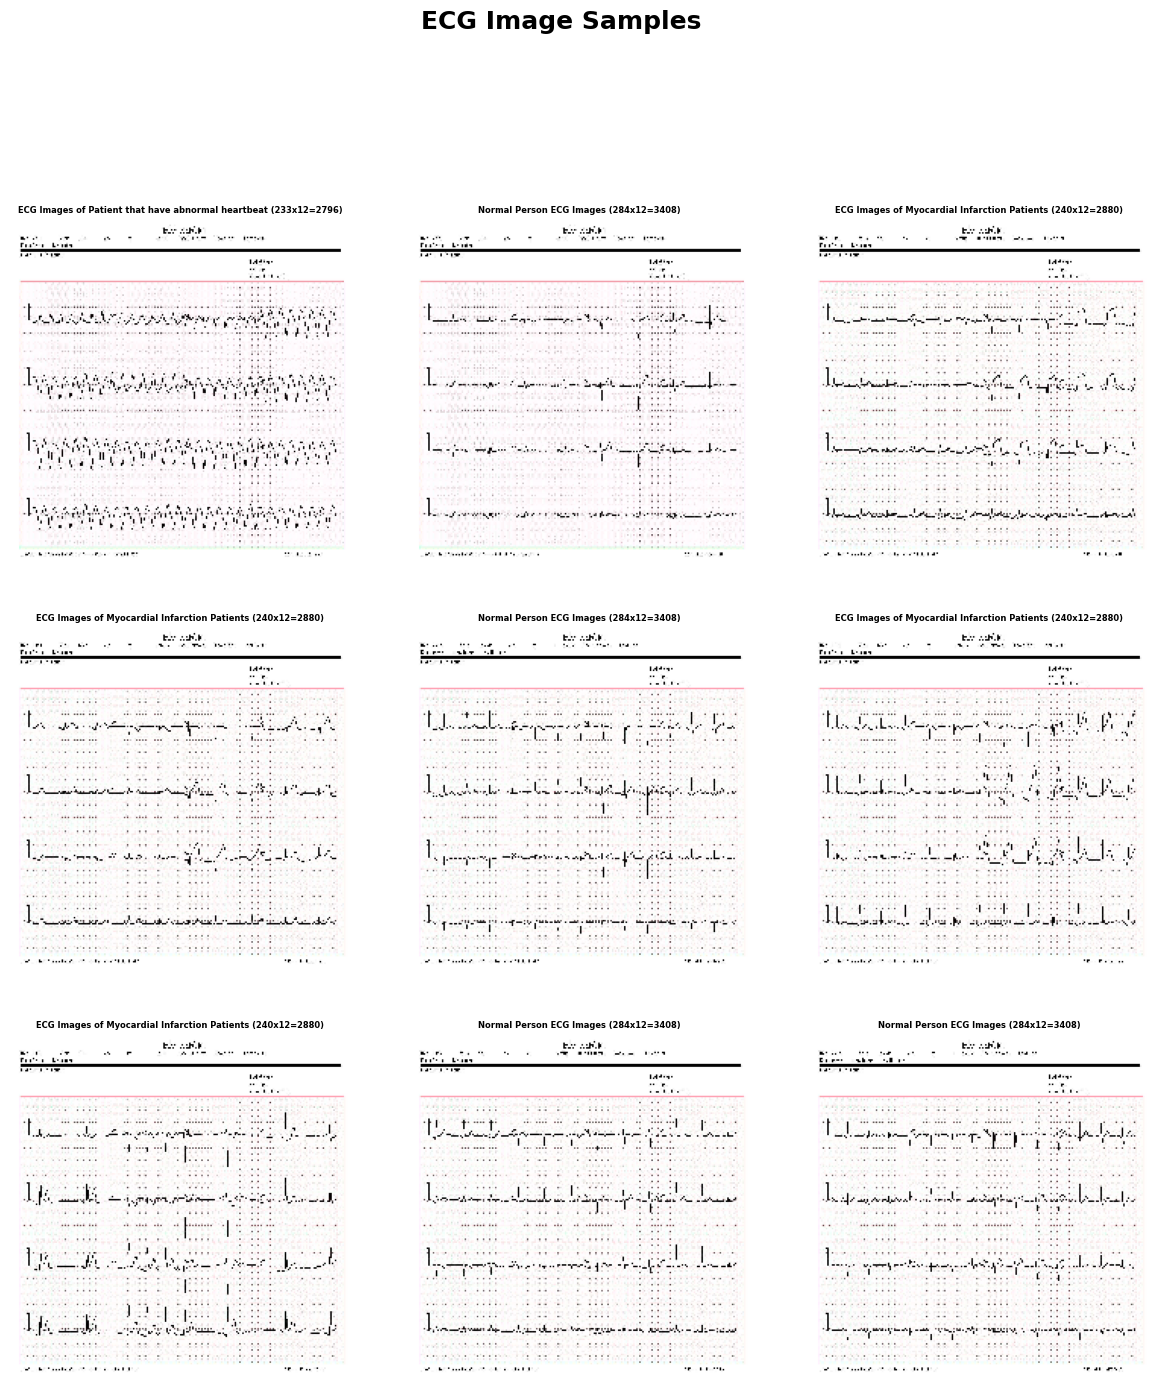

In [11]:

# Display Sample Images from Dataset
class_names = list(train_generator.class_indices.keys())

# Fetch a batch of images and labels
images, labels = next(train_generator)

# Define figure size and layout
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Increased size for better spacing
fig.suptitle("ECG Image Samples", fontsize=18, fontweight='bold', y=1.02)

# Adjust layout spacing
plt.subplots_adjust(wspace=0.1, hspace=0.2)  # More space between images

# Display each image with labels
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(class_names[np.argmax(labels[i])], fontsize=6, fontweight='bold', pad=5)
    ax.axis('off')

plt.show()


In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate Model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

# Evaluate model
y_true = []
y_pred = []

for _ in range(len(val_generator)):
    X_batch, y_batch = next(val_generator)  # Corrected line
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(model.predict(X_batch), axis=1))

# Debugging: Check class indices and labels
print("Class Indices:", val_generator.class_indices)
print("Unique Labels in y_true:", set(y_true))
print("Unique Labels in y_pred:", set(y_pred))
print("Label Mapping:", train_generator.class_indices)

# Manually define correct target names
target_names = list(val_generator.class_indices.keys())[:len(set(y_true))]  # Match the number of unique labels
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9506 - loss: 0.2636
Validation Accuracy: 95.63%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Class Indices: {'.ipynb_checkpoints': 0, 'ECG Images of Myocardial Infarction Patients (240x12=2880)': 1, 'ECG Images of Patient that have History of MI (172x12=2064)': 2, 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 3, 'Normal Person ECG Images (284x12=3408)': 4}
Unique Labels in y_true: {1, 2, 3, 4}
Unique Labels in y_pred: {1, 2, 3, 4}
Label Mapping: {'.ipynb_checkpoints': 0, 'ECG Images of Myocardial Infarction Patients (240x12=2880)': 1, 'ECG Images of Patient that have History of MI (172x12=2064)': 2, 'ECG Images of Patient that have abnormal heartbeat (233x12=2796)': 3, 'Normal Person ECG Images (284x12=3408)': 4}
               

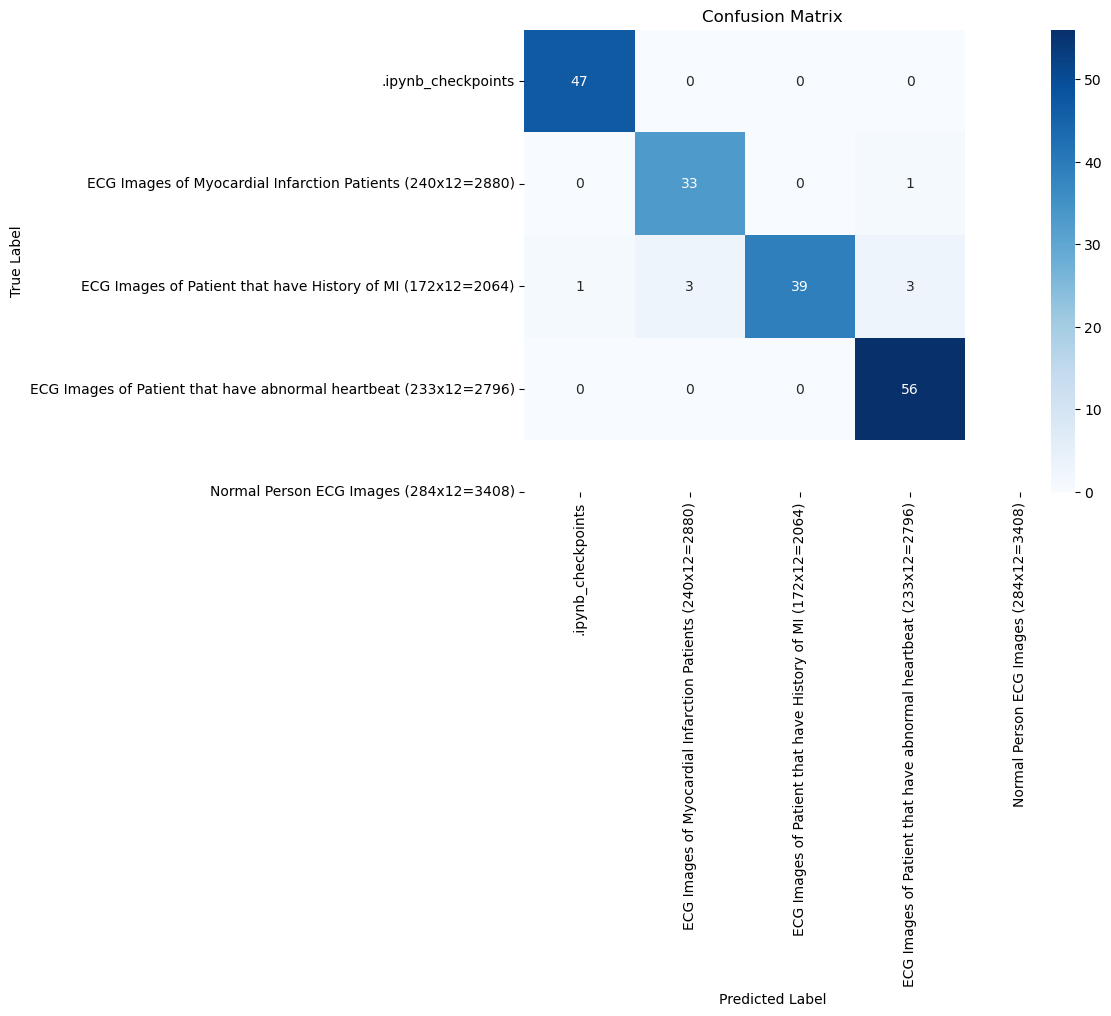

In [20]:

# Get class names from the data generator
class_names = list(val_generator.class_indices.keys())

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [23]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Generate classification report as a dictionary
report_dict = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)

# Compute separate metrics
accuracy = accuracy_score(y_true, y_pred) * 100
f1 = f1_score(y_true, y_pred, average="weighted") * 100
precision = precision_score(y_true, y_pred, average="weighted") * 100
recall = recall_score(y_true, y_pred, average="weighted") * 100

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"F1 Score: {f1:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")


Accuracy: 95.63%
F1 Score: 95.54%
Precision: 95.88%
Recall: 95.63%
